In [1]:
# importing required libraries
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas

In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check to make sure keys imported correctly, str confirms success
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Set date range as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()

In [5]:
# Create tickers variable, these should be updated as needed
# tickers = ['GME', 'AMC', 'TSLA', 'TLRY', 'SNDL', 'PLTR']
tickers = ['GME']

In [6]:
# Set timeframe to one day ('1D') to get daily data
timeframe = "1D"

In [7]:
# Get current closing prices for the tickers
df_stonks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# print(start_date)

# Display sample data
df_stonks

GME                                    
                             open      high     low   close    volume
2020-11-20 00:00:00-05:00   12.55   13.4600   12.54   12.71  16233695
2020-11-23 00:00:00-05:00   12.90   14.1200   12.67   13.90  18522123
2020-11-24 00:00:00-05:00   14.23   14.2600   13.30   13.68  13779752
2020-11-25 00:00:00-05:00   13.60   15.2500   13.42   14.75  17250470
2020-11-27 00:00:00-05:00   15.29   16.7400   14.88   16.05  24344622
...                           ...       ...     ...     ...       ...
2021-04-12 00:00:00-04:00  158.10  163.9000  135.01  141.07  16283975
2021-04-13 00:00:00-04:00  141.85  145.3771  132.00  140.80   6412974
2021-04-14 00:00:00-04:00  144.14  174.0900  143.00  166.99  20698092
2021-04-15 00:00:00-04:00  163.07  166.2546  152.80  156.32   7529149
2021-04-16 00:00:00-04:00  156.45  160.1969  151.25  154.68   4816954

[100 rows x 5 columns]

In [8]:
# Extract closing data for all stocks, start with an empty DataFrame
closing_prices_df = pd.DataFrame()

# Get the closing prices of stocks
closing_prices_df["GME"] = df_stonks["GME"]["close"]
# closing_prices_df["AMC"] = df_stonks["AMC"]["close"]
# closing_prices_df["TSLA"] = df_stonks["TSLA"]["close"]
# closing_prices_df["TLRY"] = df_stonks["TLRY"]["close"]
# closing_prices_df["SNDL"] = df_stonks["SNDL"]["close"]
# closing_prices_df["PLTR"] = df_stonks["PLTR"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
display(closing_prices_df.head())
display(closing_prices_df.tail())

,GME
2020-11-20,12.71
2020-11-23,13.90
2020-11-24,13.68
2020-11-25,14.75
2020-11-27,16.05


,GME
2021-04-12,141.07
2021-04-13,140.80
2021-04-14,166.99
2021-04-15,156.32
2021-04-16,154.68


In [9]:
closing_prices_df.hvplot.area(figsize=(10,4), ylabel="Price", xlabel="Days", color='blue', rot=90, title="Daily Closing Prices for GameStop")

:Area   [index]   (GME)

In [10]:
# Extract open data for all stocks, start with an empty DataFrame
opening_prices_df = pd.DataFrame()

# Get the opening prices of stocks
opening_prices_df["GME"] = df_stonks["GME"]["open"]
# opening_prices_df["AMC"] = df_stonks["AMC"]["open"]
# opening_prices_df["TSLA"] = df_stonks["TSLA"]["open"]
# opening_prices_df["TLRY"] = df_stonks["TLRY"]["open"]
# opening_prices_df["SNDL"] = df_stonks["SNDL"]["open"]
# opening_prices_df["PLTR"] = df_stonks["PLTR"]["open"]

# Drop the time component of the date
opening_prices_df.index = opening_prices_df.index.date

# Display sample data
display(closing_prices_df.head())
display(closing_prices_df.tail())

,GME
2020-11-20,12.71
2020-11-23,13.90
2020-11-24,13.68
2020-11-25,14.75
2020-11-27,16.05


,GME
2021-04-12,141.07
2021-04-13,140.80
2021-04-14,166.99
2021-04-15,156.32
2021-04-16,154.68


In [11]:
opening_prices_df.hvplot.area(figsize=(10,4), ylabel="Price", xlabel="Days", color='orange', rot=45, title="Daily Opening Prices for GameStop")

:Area   [index]   (GME)

In [12]:
from finta import TA

In [13]:
# Create a GME DF to test technical indicators
gme_df = pd.DataFrame(closing_prices_df['GME'])
display(gme_df.head())
display(gme_df.tail())

,GME
2020-11-20,12.71
2020-11-23,13.90
2020-11-24,13.68
2020-11-25,14.75
2020-11-27,16.05


,GME
2021-04-12,141.07
2021-04-13,140.80
2021-04-14,166.99
2021-04-15,156.32
2021-04-16,154.68


In [14]:
# Create colum for actual returns 
gme_df['actual_returns'] = gme_df.pct_change()

# Review the data
gme_df.head()

,GME,actual_returns
2020-11-20,12.71,NaN
2020-11-23,13.90,0.093627
2020-11-24,13.68,-0.015827
2020-11-25,14.75,0.078216
2020-11-27,16.05,0.088136


In [15]:
# Setting short, medium and long SMAs, starting with the short
gme_df['50_day_sma'] = gme_df['GME'].rolling(window=50).mean()

# Setting the medium SMA
gme_df['150_day_sma'] = gme_df['GME'].rolling(window=150).mean()

# Setting the long SMA
gme_df['200_day_sma'] = gme_df['GME'].rolling(window=200).mean()

In [16]:
gme_df.tail()

,GME,actual_returns,50_day_sma,150_day_sma,200_day_sma
2021-04-12,141.07,-0.108957,144.318970,NaN,NaN
2021-04-13,140.80,-0.001914,140.570170,NaN,NaN
2021-04-14,166.99,0.186009,139.369970,NaN,NaN
2021-04-15,156.32,-0.063896,140.686970,NaN,NaN
2021-04-16,154.68,-0.010491,141.939708,NaN,NaN


In [17]:
# Initialize the new `Signal` column on GME df
gme_df['signal'] = 0.0

In [18]:
# Generate signal to buy GME long
gme_df.loc[(gme_df['GME'] >= gme_df['50_day_sma'])
           & (gme_df['50_day_sma'] >= gme_df['150_day_sma'])
           & (gme_df['150_day_sma'] >= gme_df['200_day_sma']), 
           'signal'] = 1

In [19]:
gme_df.tail()

,GME,actual_returns,50_day_sma,150_day_sma,200_day_sma,signal
2021-04-12,141.07,-0.108957,144.318970,NaN,NaN,0.0
2021-04-13,140.80,-0.001914,140.570170,NaN,NaN,0.0
2021-04-14,166.99,0.186009,139.369970,NaN,NaN,0.0
2021-04-15,156.32,-0.063896,140.686970,NaN,NaN,0.0
2021-04-16,154.68,-0.010491,141.939708,NaN,NaN,0.0


In [20]:
import yfinance as yf

In [21]:
# Set symbol and convert to ticker for yfinance
symbol = 'GME'
ticker = yf.Ticker(symbol)

In [22]:
# Get gme data
data = ticker.history(period='1y',
                     inderval='1d',
                     actions=True,
                     auto_adjust=True)

In [23]:
# preview data
display(data.head())
display(data.tail())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-01,5.65,6.18,5.45,6.05,4005600,0,0
2020-05-04,5.84,5.93,5.40,5.48,4068100,0,0
2020-05-05,5.55,5.63,5.35,5.39,2105900,0,0
2020-05-06,5.40,5.40,4.90,4.93,3369600,0,0
2020-05-07,4.83,4.93,4.65,4.87,2500800,0,0


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-26,150.979996,174.679993,148.759995,168.929993,10532100,0,0
2021-04-27,183.550003,188.000000,173.169998,177.770004,8932700,0,0
2021-04-28,172.100006,181.979996,166.029999,178.580002,5788900,0,0
2021-04-29,176.559998,180.860001,170.750000,176.190002,3753500,0,0
2021-04-30,175.000000,183.800003,172.699997,173.589996,4327092,0,0


In [24]:
# extract the close column
gme_df_2 = pd.DataFrame(data['Close'])
gme_df_2.head()

,Close
Date,
2020-05-01,6.05
2020-05-04,5.48
2020-05-05,5.39
2020-05-06,4.93
2020-05-07,4.87


In [25]:
# Setting short, medium and long SMAs, starting with the short
gme_df_2['50_day_sma'] = gme_df_2['Close'].rolling(window=50).mean()

# Setting the medium SMA
gme_df_2['150_day_sma'] = gme_df_2['Close'].rolling(window=150).mean()

# Setting the long SMA
gme_df_2['200_day_sma'] = gme_df_2['Close'].rolling(window=200).mean()

# preview data
gme_df_2.tail()

,Close,50_day_sma,150_day_sma,200_day_sma
Date,,,,
2021-04-26,168.929993,154.7000,72.967800,56.05210
2021-04-27,177.770004,157.2074,74.094600,56.91925
2021-04-28,178.580002,159.7888,75.214733,57.79085
2021-04-29,176.190002,162.3938,76.322400,58.65140
2021-04-30,173.589996,165.0518,77.418733,59.49840


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022210A25370>,
      dtype=object)

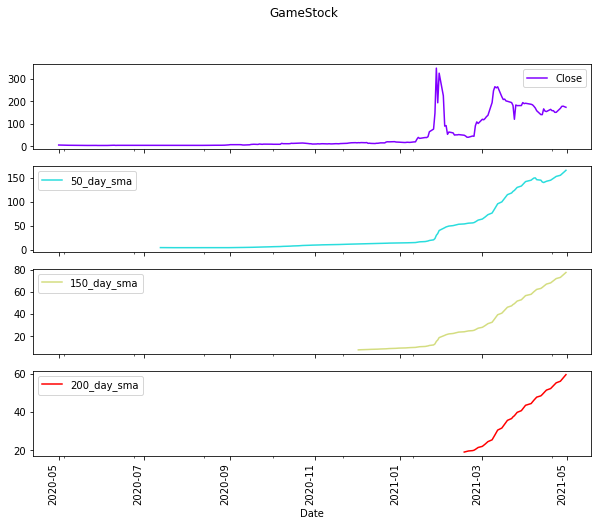

In [26]:
gme_df_2.plot(title="GameStock", subplots=True, figsize=(10,8), rot=90, colormap="rainbow")

In [27]:
# Initialize the new `Signal` column on GME_2 df
gme_df_2['signal'] = 0.0

In [28]:
# Generate signal to buy GME long
gme_df_2.loc[(gme_df_2['Close'] >= gme_df_2['50_day_sma'])
           & (gme_df_2['50_day_sma'] >= gme_df_2['150_day_sma'])
           & (gme_df_2['150_day_sma'] >= gme_df_2['200_day_sma']), 
           'signal'] = 1

In [29]:
gme_df_2

,Close,50_day_sma,150_day_sma,200_day_sma,signal
Date,,,,,
2020-05-01,6.050000,NaN,NaN,NaN,0.0
2020-05-04,5.480000,NaN,NaN,NaN,0.0
2020-05-05,5.390000,NaN,NaN,NaN,0.0
2020-05-06,4.930000,NaN,NaN,NaN,0.0
2020-05-07,4.870000,NaN,NaN,NaN,0.0
...,...,...,...,...,...
2021-04-26,168.929993,154.7000,72.967800,56.05210,1.0
2021-04-27,177.770004,157.2074,74.094600,56.91925,1.0
2021-04-28,178.580002,159.7888,75.214733,57.79085,1.0


[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
2021-04-20, ===Global level arguments===
2021-04-20, init_cash : 100000
2021-04-20, buy_prop : 1
2021-04-20, sell_prop : 1
2021-04-20, commission : 0.0075
2021-04-20, stop_loss : 0
2021-04-20, stop_trail : 0
===Strategy level arguments===
fast_period : 1
slow_period : 50
2021-04-20, Final Portfolio Value: 1759366.6760383868
2021-04-20, Final PnL: 1659366.68
Time used (seconds): 0.05601239204406738
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:1	slow_period:50
Returns	rtot:2.8675389941250127	ravg:0.011379122992559575	rnorm:16.593666760383865

<IPython.core.display.Javascript object>

,strat_id,init_cash,buy_prop,sell_prop,commission,stop_loss,stop_trail,execution_type,channel,symbol,...,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,0,0,close,,,...,1659.366676,57,75.653705,5.467058e+06,"{'len': 57, 'drawdown': 85.51914905881847, 'mo...",85.519149,57,11.268849,1659366.68,1.759367e+06


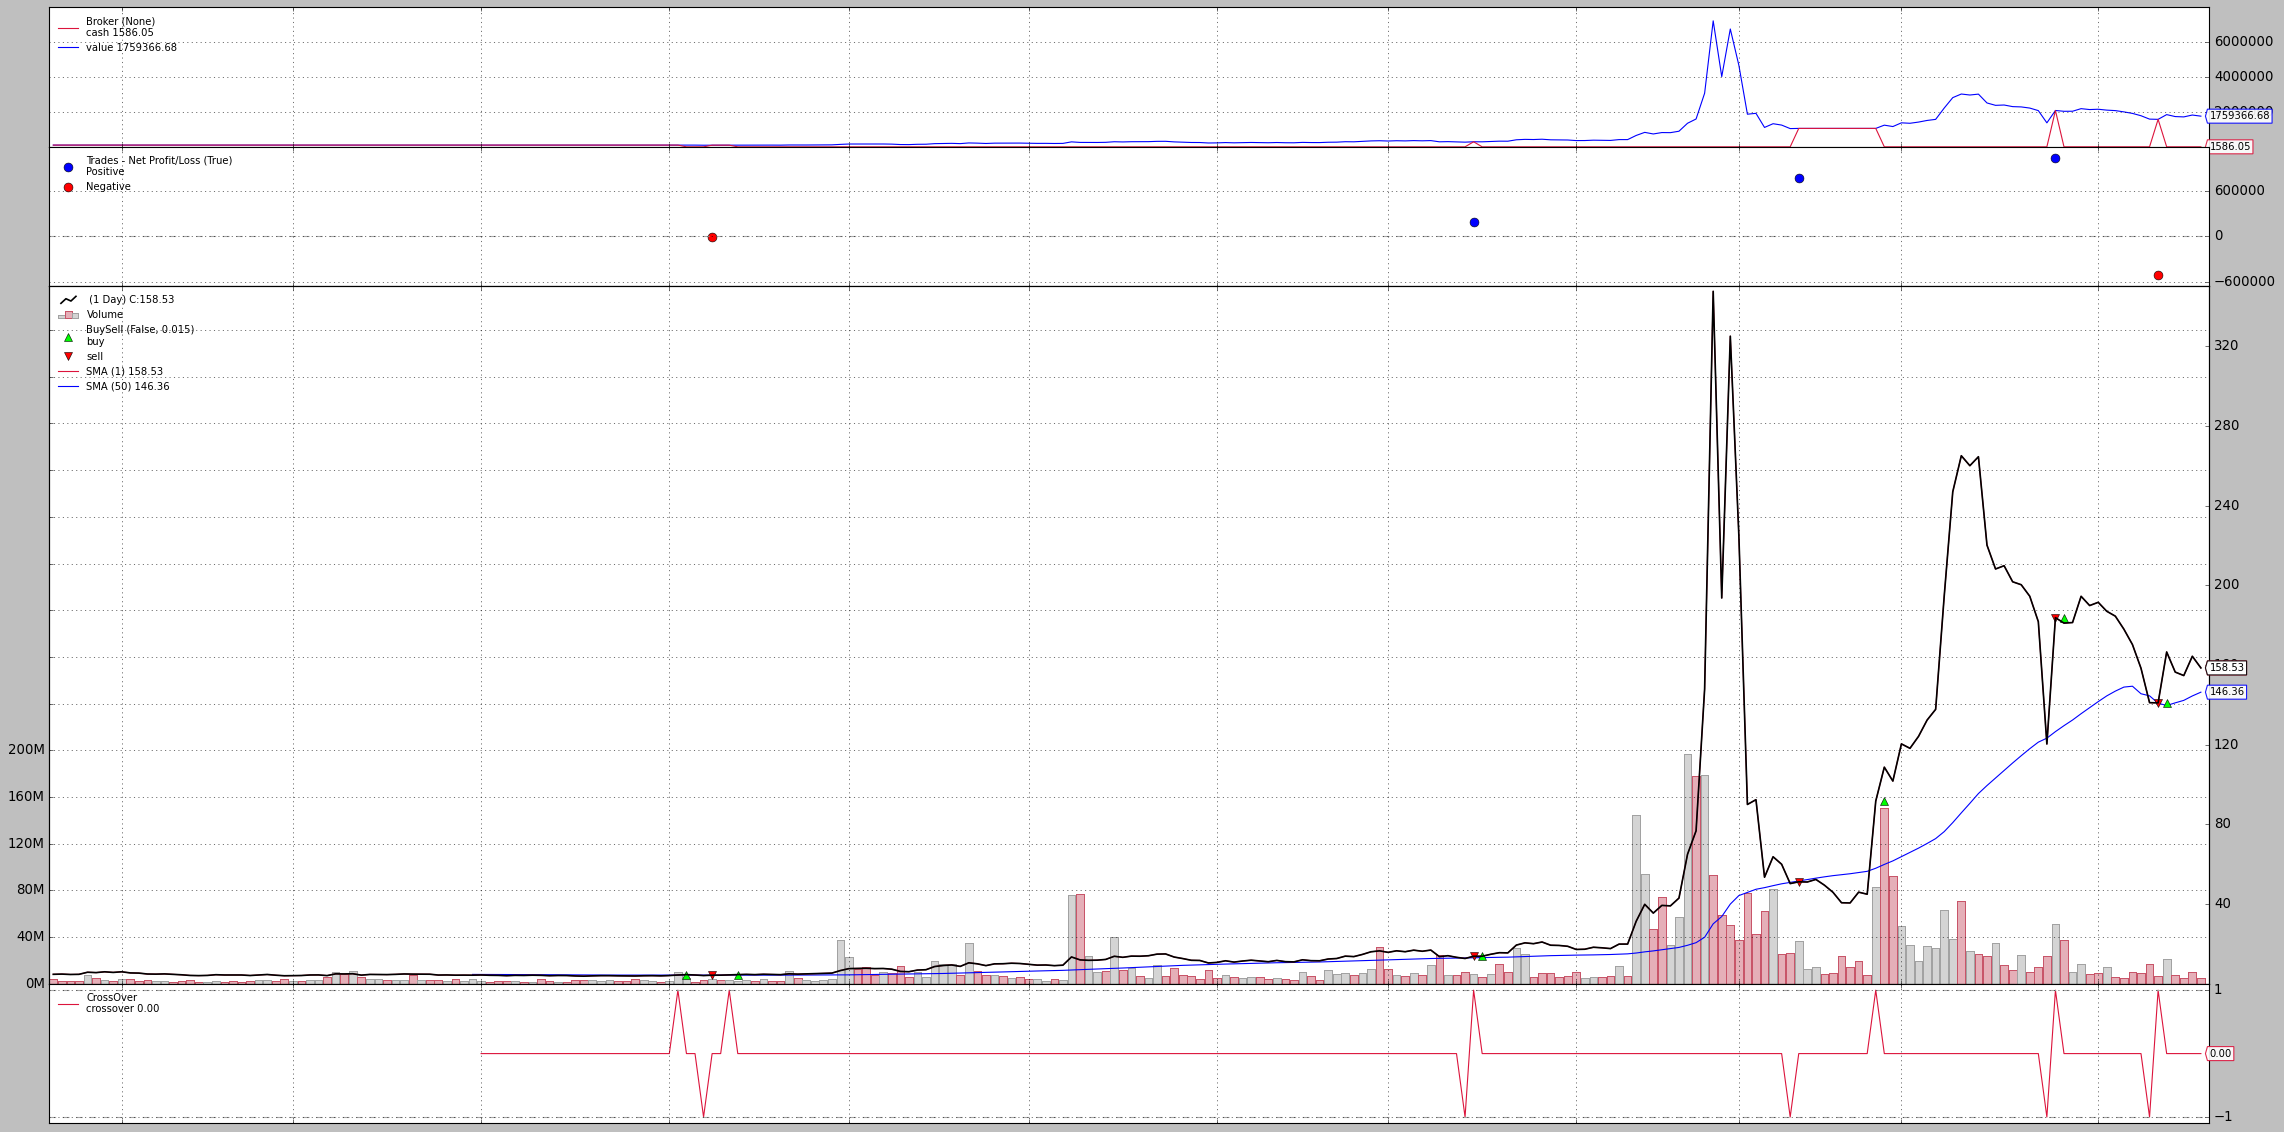

In [30]:
# Backtest
from fastquant import backtest, get_stock_data
gme_backtest = get_stock_data("GME", "2020-04-21", "2021-04-21")
backtest('smac', gme_backtest, fast_period=1, slow_period=50)

In [31]:
# Start to build machine learning model by splitting data
X = gme_df_2[['50_day_sma', '150_day_sma', '200_day_sma']].shift().dropna()

# Review the DataFrame
X.head()

,50_day_sma,150_day_sma,200_day_sma
Date,,,
2021-02-17,53.6902,23.791533,18.98520
2021-02-18,54.2866,24.070600,19.18465
2021-02-19,54.7624,24.313933,19.36070
2021-02-22,55.2472,24.556733,19.53670
2021-02-23,55.8284,24.837000,19.74205


In [32]:
# Create dataset to predict
y = gme_df_2['signal']

y[:5]

Date
2020-05-01    0.0
2020-05-04    0.0
2020-05-05    0.0
2020-05-06    0.0
2020-05-07    0.0
Name: signal, dtype: float64

In [33]:
from pandas.tseries.offsets import DateOffset
# set the start of the training
training_start = X.index.min()
training_start

Timestamp('2021-02-17 00:00:00')

In [34]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=2)

In [35]:
# define the train data
X_train = X.loc[training_start:training_end]
y_train = y.loc[training_start:training_end]

In [36]:
# define the test data
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

In [37]:
# Import 
from sklearn.preprocessing import StandardScaler

In [38]:
# Initialize the model
scaler = StandardScaler()

In [39]:
# Fit the model
X_scaler = scaler.fit(X_train)

In [40]:
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# import SVC calissifier model
from sklearn.svm import SVC

# Instantiate SVC classifier model
svm_model = SVC()
 
# Fit the model to the data
svm_model = svm_model.fit(X_train_scaled,y_train)
 
# Make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

In [44]:
from sklearn.metrics import classification_report

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test,svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10

